**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved



# **Part 1:  Cleaning and Preprocessing Automobile Data**
In this project, we will investigate automobile features from a dataset and preprocess the data.

As we clean and explore this data, you will gain practice with:

*  Reading simple csv files and using Pandas, Numpy, and Matplotlib
*  Working with data at different levels of granularity
*  Identifying the type of data collected, missing values, anomalies, etc.
*  Exploring characteristics and distributions of individual variablesa

The following list provides several example dataset links.  (these will be useful for future project assignments).
- UCI: https://archive.ics.uci.edu/
- Wikipedia:  https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research/
- Kaggle:  https://www.kaggle.com/datasets/
- National Geospatial Program:  https://www.usgs.gov/core-science-systems/national-geospatial-program/data-tools/
- Seattle Central College Quant Environmental learning Project:  https://seattlecentral.edu/qelp/Data.html
- Carnegie Mellon:  http://lib.stat.cmu.edu/datasets/
- NIST:  https://www.itl.nist.gov/div898/strd/
- MNIST:  https://chromium.googlesource.com/external/github.com/tensorflow/tensorflow/+/r0.7/tensorflow/g3doc/tutorials/mnist/download/index.md


The following instructions are identified as Steps in the text cells preceding their corresponding code cell. Read through the instructions and write/fill-in the appropriate code in the cells.   

Make sure your code passes all the embedded doctests.

**Step 1:**  
Mount your Google drive and copy the provided files to your working directory.  Alternatively, you can read the file directly from the link provided in the cell below.
- imports-85.csv
- imports-85.names


In [1]:
#Mounts the google drive
import csv
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
!cp drive/My\ Drive/Colab\ Notebooks/'imports-85.csv' .
!cp drive/My\ Drive/Colab\ Notebooks/'imports-85.names' .

Mounted at /content/drive/


**Step 2:**  
Import all relevant python libraries:
- numpy
- pandas
- matplotlib (pyplot)

In [2]:
#Imports the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Step 3:**  
Read the auto data into a Pandas dataframe.  
NAME YOUR DATAFRAME VARIABLE '**data**' to be compatible with the embedded doctests.  Read the provided csv file directly.

Note, you should set up a list of column headers according to the imports-85.names file.   
Examine the first 5 rows of the dataset, and check out the dataset statistics.

Hints:
- https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html







In [3]:
#Reads the dataset directly from the provided link.
#Creates a list of the headers according to the imports-85.names file.
namesFile = open('imports-85.names', 'r')
names = []
num = 0
for line in namesFile:
  word = ''
  for ch in line:
    num = num + 1
    if ch != ':' and num>5:
      word = word + ch
    elif ch == ':':
      break
  names.append(word)
  num = 0
print(names)
print(len(names))

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
26


In [4]:
#Reads the dataset from the provided csv file
#Creates a list of the headers according to the imports-85.names file.
dataRead = pd.read_csv('imports-85.csv',header=None)
data = pd.DataFrame(dataRead)
dArray = np.array(data)
data.columns = names
print(data.shape)


(205, 26)


[link text](https://)**Step 4:**  
Replace all the ?'s in the dataset with NaN.  
Perform the operation 'in-place', meaning it replaces within the same object (not in another data structure).  
Examine the first 5 rows to confirm your replacement.   
Make sure your code passes the doctest.

Hint:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html



In [5]:
#Replaces all ? with NaN
data.replace('?', np.nan, inplace=True)

#Doctest code
import doctest
"""
  >>> print(data['normalized-losses'].iat[1])
  nan
  >>> print(data['peak-rpm'].iat[131])
  nan
  >>> print(data['horsepower'].iat[130])
  nan
"""

doctest.testmod()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



TestResults(failed=0, attempted=3)

**Step 5:**  
Find and count the missing data (i.e. the entries that were changed to NaN in the previous step).  
Suggested method:
*   First mark the missing data with "True"
*   Count the "True" tags in a loop

Make sure your code passes the doctest.

Hints:
- https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html


In [6]:
#Detects and counts the missing data

missing_data = pd.isna(data)
missing_data.column = names

for ii in range(missing_data.shape[1]):
  missing_data[names[ii]].value_counts()

#Doctest code: It outputs the right numbers, but it is showing that all the test cases failed because the code is printing incorrectly for some reason
import doctest
"""
  >>> print(missing_data['normalized-losses'].value_counts())
  False    164
  True      41
  Name: normalized-losses, dtype: int64
  >>> print(missing_data['symboling'].value_counts())
  False    205
  Name: symboling, dtype: int64
  >>> print(missing_data['bore'].value_counts())
  False    201
  True       4
  Name: bore, dtype: int64
  >>> print(missing_data['horsepower'].value_counts())
  False    203
  True       2
  Name: horsepower, dtype: int64
"""

doctest.testmod()

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(missing_data['normalized-losses'].value_counts())
Expected:
    False    164
    True      41
    Name: normalized-losses, dtype: int64
Got:
    normalized-losses
    False    164
    True      41
    Name: count, dtype: int64
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(missing_data['symboling'].value_counts())
Expected:
    False    205
    Name: symboling, dtype: int64
Got:
    symboling
    False    205
    Name: count, dtype: int64
**********************************************************************
File "__main__", line 10, in __main__
Failed example:
    print(missing_data['bore'].value_counts())
Expected:
    False    201
    True       4
    Name: bore, dtype: int64
Got:
    bore
    False    201
    True       4
    Name: count, dtype: int64
*************

<ipython-input-6-b890da014cd6>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  missing_data.column = names


TestResults(failed=4, attempted=4)

**Step 6:**  
Now in order to perform an modeling on our dataset, we'll need to account for the missing data.  Some options include removing the row altogether, but this may also delete other meaningful data, so more common approaches include replacing missing data with a statistic, such as with the mean of the feature column or replacing it with the most common option of the feature.  
Perform the following operations:
1.   Replace missing data in the 'normalized-losses' feature with its mean.
2.   Replace missing data 'num-of-doors' and 'bore' features with the most common option in their respective feature column.
3.   Drop the example ROW if the 'price' feature is missing for that example.  Note, axis=0 drops whole row, axis=1 drops whole column

Make sure your code passes the doctest.


Hints:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html



In [7]:
#Replaces missing data in the 'normalized-losses' feature with its mean.

colNLnoNAN = pd.Series(data['normalized-losses'].dropna())
colMean = colNLnoNAN.astype(float).mean()
data['normalized-losses'] = data['normalized-losses'].fillna(colMean)

#Doctest code
import doctest
"""
  >>> print(data['normalized-losses'].iat[1])
  122.0
  >>> print(data['normalized-losses'].iat[15])
  122.0
"""

doctest.testmod()

TestResults(failed=0, attempted=2)

In [8]:
#Replaces missing data 'num-of-doors' and 'bore' features with the most common option in their respective feature column.

doorType = np.array(data['num-of-doors'])
if (np.shape(np.where(doorType == 'two'))[1] > np.shape(np.where(doorType == 'four'))[1]):
  repDoor = 'two'
else:
  repDoor = 'four'
data['num-of-doors'] = data['num-of-doors'].fillna(repDoor)

from scipy import stats
modeVal = stats.mode((data['bore'].dropna()).astype(float)).mode
data['bore'] = data['bore'].fillna(modeVal)


#Doctest code
import doctest
"""
  >>> print(data['num-of-doors'].iat[27])
  four
  >>> print(data['bore'].iat[57])
  3.62
"""

doctest.testmod()

TestResults(failed=0, attempted=2)

In [9]:
#Drops the example ROW if the 'price' feature is missing for that example.

priceCol = np.array(data['price']).astype(float)
noPrRow = np.argwhere(np.isnan(priceCol))[:,0]
for ii in range(noPrRow.shape[0]):
  data = data.drop(noPrRow[ii])

#Doctest code
import doctest
"""
  >>> print(len(data['price']))
  201
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

**Step 7:**  
We typically want any categorical data with string data types to be formatted as objects when preparing data for our machine learning model.  Also, any numeric values should be int or float types.  Finally, columns that have IDs typed as objects but are actually numeric values should be converted to their numeric types.  Perform the following on your dataset.
*  Print out the data types
*  Change data types for numeric columns that are identified as objects

Compare the updated data types to the original print out to make sure they were updated.   
Make sure your code passes the doctest.

Hints:
- bore, stroke, normalized-losses, peak-rpm all need to change.  Note, you will need to replace the NaNs as needed first (replace with mean of column).
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html




In [10]:
#Changes data types for numeric columns that are identified as objects

data['bore'] = data['bore'].astype(float)
data['stroke'] = data['stroke'].astype(float)
data['normalized-losses'] = data['normalized-losses'].astype(int)
data['price'] = data['price'].astype(float)

rpmMean = pd.Series(data['normalized-losses'].dropna()).astype(float).mean()
data['peak-rpm'] = data['peak-rpm'].fillna(rpmMean)
data['peak-rpm'] = data['peak-rpm'].astype(int)


#Doctest code
import doctest
"""
  >>> print(data[['bore', 'stroke', 'normalized-losses', 'price', 'peak-rpm']].dtypes)
  bore                 float64
  stroke               float64
  normalized-losses      int64
  price                float64
  peak-rpm               int64
  dtype: object
"""

doctest.testmod()

TestResults(failed=0, attempted=1)

**Step 8:**  
Many machine learning algorithms are sensitive to features with different ranges, for example, linear regression.  So, normalization is a common practice to implement on the data.

*   Normalize the 'length', 'height' and 'width' columnsa

Make sure your code passes the doctest.


Hint:  there isn't a built-in Pandas function so a simply conversion is to divide each element by the feature maximum.
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html

In [11]:
#Normalizes the length, height, and width columns
#Divides each element of column by its max value

lengthCol = data['length'].astype(float)
lengthCol = np.round((lengthCol/lengthCol.max()), 4)
data['length'] = lengthCol

heightCol = data['height'].astype(float)
heightCol = np.round((heightCol/heightCol.max()), 4)
data['height'] = heightCol

widthCol = data['width'].astype(float)
widthCol = np.round((widthCol/widthCol.max()), 4)
data['width'] = widthCol

#Below is the code for step 9

#hpMean = (pd.Series(data['horsepower'].dropna())).astype(float).mean()
#hp = np.array(data['horsepower'].fillna(hpMean)).astype(int)

#hpBinLimits = np.linspace(np.min(hp), np.max(hp), 5)

#ltLow = []
#ltMedgtLow = []
#ltHighgtMed = []
#gtHigh = []

#for ii in range(hp.shape[0]):
#  if ((hp[ii] >= hpBinLimits[0]) and (hp[ii] < hpBinLimits[1])):
#    ltLow = np.append(ltLow, hp[ii])
#  elif ((hp[ii] >= hpBinLimits[1]) and (hp[ii] < hpBinLimits[2])):
#    ltMedgtLow = np.append(ltMedgtLow, hp[ii])
#  elif ((hp[ii] >= hpBinLimits[2]) and (hp[ii] < hpBinLimits[3])):
#    ltHighgtMed = np.append(ltHighgtMed, hp[ii])
#  else:
#    gtHigh = np.append(gtHigh, hp[ii])

#hpCounts = np.array([ltLow.shape[0], ltMedgtLow.shape[0], ltHighgtMed.shape[0], gtHigh.shape[0]])

#plt.hist(hpBinLimits[:-1], hpBinLimits, weights=hpCounts)
#plt.show()

#[npCounts, npBins] = np.histogram(hp)

#Doctest code
import doctest
"""
  >>> print(np.round(data['length'].iat[0],4))
  0.8111
  >>> print(np.round(data['height'].iat[27],4))
  1.0
  >>> print(np.round(data['width'].iat[57],4))
  0.9236
  >>> print(np.round(data['length'].iat[3],4))
  0.8486
  >>> print(np.round(data['height'].iat[85],4))
  0.8629
  >>> print(np.round(data['width'].iat[163],4))
  0.9111
"""

doctest.testmod()

TestResults(failed=0, attempted=6)

**Step 9:**  
Data visualization - data binning

*   Generate a histogram plot of the horsepower data into high, med, low bins
*   Take a screenshot of your plot and paste it into a document to submit with this assignment.  Your plot should look similar to this:

![alt text](https://drive.google.com/uc?id=1ymbq21BzRcXh7jGKoHrQ1Dh-IKCT2STS)  


Hints:
- First replace any NaNs with the mean of the column, and convert objects to integers
- Group the feature into 4 different ranges:  less than 'low', between 'low' and 'med', between 'med' and 'high', and greater than 'high.
- Count the values in each of the ranges
- Plot the bins on a histogram
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
- https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
- https://pandas.pydata.org/docs/reference/api/pandas.cut.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


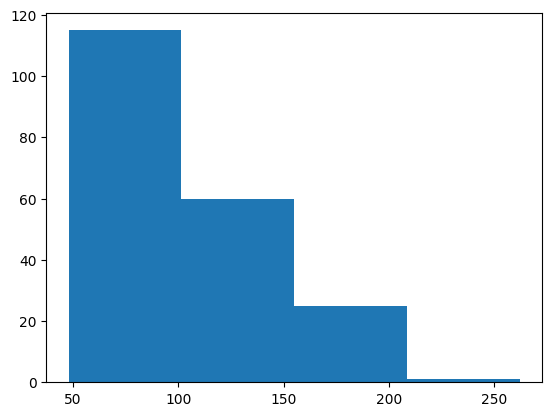

In [12]:
#Creates bin array with min, max and range using numpy linspace
#and setups 3 bins (high, med, low) - 4 dividers in the histogram
#Removes NaNs and convert objects to integers
#Groups the feature into 4 different ranges: <= 'low', >'low' && <='med', >'med'&& <='high', >'high.
#Counts the values in each of the ranges
#Plots the bins on a histogram

hpMean = (pd.Series(data['horsepower'].dropna())).astype(float).mean()
hp = np.array(data['horsepower'].fillna(hpMean)).astype(int)
data['horsepower'] = hp

hpBinLimits = np.linspace(np.min(hp), np.max(hp), 5)

ltLow = []
ltMedgtLow = []
ltHighgtMed = []
gtHigh = []

for ii in range(hp.shape[0]):
  if ((hp[ii] >= hpBinLimits[0]) and (hp[ii] < hpBinLimits[1])):
    ltLow = np.append(ltLow, hp[ii])
  elif ((hp[ii] >= hpBinLimits[1]) and (hp[ii] < hpBinLimits[2])):
    ltMedgtLow = np.append(ltMedgtLow, hp[ii])
  elif ((hp[ii] >= hpBinLimits[2]) and (hp[ii] < hpBinLimits[3])):
    ltHighgtMed = np.append(ltHighgtMed, hp[ii])
  else:
    gtHigh = np.append(gtHigh, hp[ii])

hpCounts = np.array([ltLow.shape[0], ltMedgtLow.shape[0], ltHighgtMed.shape[0], gtHigh.shape[0]])

plt.hist(hpBinLimits[:-1], hpBinLimits, weights=hpCounts)
plt.show()

**Step 10:**  
Write the preprocessed dataset to a csv file

Hint:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
- Use '!cp' to copy the file to a folder on your Google drive




In [13]:
#Writes preprocessed dataset to csv file
import csv
outDataFile = open('Output.csv',mode = 'w')
data.to_csv(outDataFile, sep=',')
!cp Output.csv drive/My\ Drive/Colab\ Notebooks/

# **Part 2:  Modeling your Pre-processed Automobile Data**
Now that you have cleaned your dataset you are ready to apply a machine learning model.

<br>

**Simple Linear Regression - Manual Calculation**  

In this part, you will perform a manual calculation of the coefficients used in a simple linear regression model for a given dataset.  For now, just follow the steps outlined in the following procedure - we will discuss Regression in depth in the Machine Learning Algorithms course.

We will attempt to fit a simple linear regression model using 2 features from the cleaned dataset.  The model "score" will help us determine how well one variable can predict another.

Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  

-  **Step 1**:  Create a function which MANALLY (using the equations below) calculates the coefficients for a simple linear regression model.
  - Inputs:  X = dataset independent variable, y = dataset dependent variable
  - Return: coefficients b0, and b1

  (NOTE, you may NOT use any machine learning library models for this step - you must calculate the parameters use the equations shown).  

$$\hat y = b_0+b_1x_1$$  
$$b_1=\frac {\sum
(x_n-\bar x)(y_n-\bar y)} {\sum
(x_n-\bar x)^2}
$$  
$$b_0=\bar y-b_1\bar x$$  

-  **Step 2**: Create a function which generates a predicted output y_hat using the prediction equation from the previous step.
  - Inputs:  X = dataset independent variable, coefs = regression model coefficients (b0, b1)
  - Return: predicted output y_hat
-  **Step 3**: Create a function which plots the dataset (X, y) and the calculated regression line (equation of the prediction line y_hat)
  - Inputs:  X = dataset independent variable, y = dataset dependent variable, y_hat = predicted output
  - Return: none
-  **Step 4**:  Create a function which calculates the performance using R-squared using sklearn r2_score function (you may use the sklearn library for this step). Read the documentation on this function to get a feel for the range and interpretation of this score.  We will discuss R-squared scores in detail when covering Regression, but for now, you may simply call the sklearn function. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
  - Inputs: y = actual dependent variables, y_hat = predicted output based on calculated regression line
  - Return: R_squared value
-  **Step 5**:  Confirm your calculated coefficients and R-squared performance metric using the embedded doctest module.  Record your regression equation.
The doctest will attempt to call your plot function and package it into a set of subplots, which should like the following:
<br>

![alt text](https://drive.google.com/uc?id=1P_dukwYyzHGvuLj4NOLMnAtJFIJ8Ywr-)  

-  **Step 6**:  Reflect on the performance of your model.  What does the R-squared parameter tell you about the properties of this dataset and your simple linear prediction?  Which of the independent variables best predicted the normalized-losses variable?  Given the R-squared scores you saw, is this a good model?


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


#         Creates a function which MANALLY (using the equations) calculates the
#         coefficients for a simple linear regression model.
#         Your function must input numpy arrays for the X and y variables and return b0 and b1.
#         Your function MUST use equations shown in the text cell above.
#         (i.e. - you may not use a Machine Learning library API for this step,
#                 calculate the parameters use the equations above).
#         Inputs:  X = dataset independent variable, y = dataset dependent variable
#         Return: coefficients b0, and b1
def simple_LR_coefs(x, y):

  xIn = np.array(x)
  yIn = np.array(y)

  xMean = np.mean(xIn)
  yMean = np.mean(yIn)

  b1 = np.sum((yIn - yMean) * (xIn - xMean))/np.sum((xIn - xMean)**2)
  b0 = yMean - b1 * xMean

  return b0, b1

#               Creates a function which generates a predicted output y_hat
#               using the prediction equation in the text cell above.
#               Your function MUST use equations shown in the text cell above.
#               (i.e. - you may not use a Machine Learning library API)
#               Inputs:  X = dataset independent variable,
#                        coefs = regression model coefficients (b0, b1)
#               Return: predicted output y_hat
def prediction(x, coefs):

  xIn = np.array(x)
  y_hat = coefs[0] + coefs[1] * x

  return y_hat


#         Creates a function plots the dataset and the calculated regression line
#         Inputs:  X = dataset independent variable, y = dataset dependent variable,
#                  y_hat = predicted output
#         Return: none
def plot(x, y, y_hat):
  xIn = np.array(x)
  yIn = np.array(y)
  yHatIn = np.array(y_hat)

  plt.plot(xIn, yIn, 'yo', xIn, yHatIn, '--k')
  plt.show()


#         Creates a function which calculates the performance using R-squared using sklearn r2_score function.
#         Inputs: y = actual dependent variables, y_hat = predicted output based on calculated regression line
#         Return: R_squared value
#         Hint:  see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
def score(y, y_hat):
  yHatIn = np.array(y_hat)
  yIn = np.array(y)

  score = r2_score(y, y_hat)

  return score


#Doctest code

import doctest
X_test = np.array([data['normalized-losses'],
                   data['length'],
                   data['horsepower'],
                   data['symboling']])

y = data['normalized-losses']


"""
  >>> print(np.round(simple_LR_coefs(X_test[0], y), 5))
  [0. 1.]
  >>> print(np.round(score(y, prediction(X_test[0], (simple_LR_coefs(X_test[0], y)))), 5))
  1.0
  >>> print(np.round(score(y, prediction(X_test[1], (simple_LR_coefs(X_test[1], y)))), 5))
  0.00038
  >>> print(np.round(simple_LR_coefs(X_test[2], y), 5))
  [102.76122   0.18607]
  >>> print(np.round(score(y, prediction(X_test[2], (simple_LR_coefs(X_test[2], y)))), 5))
  0.04722
  >>> print(np.round(simple_LR_coefs(X_test[3], y), 5))
  [112.00354  11.88928]
  >>> print(np.round(score(y, prediction(X_test[3], (simple_LR_coefs(X_test[3], y)))), 5))
  0.2174
"""

doctest.testmod()


TestResults(failed=0, attempted=7)